# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
Ra

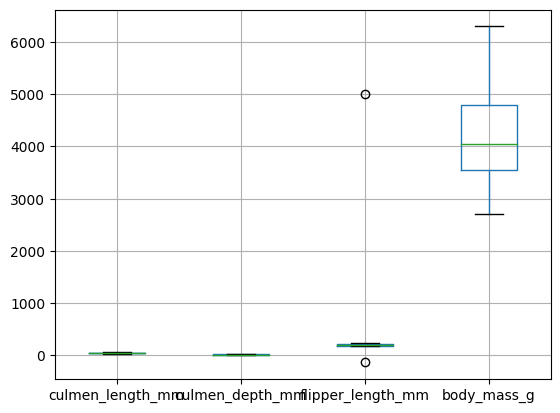

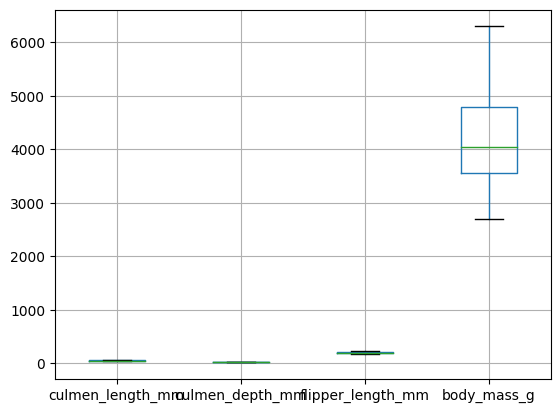

In [145]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.info())
print(penguins_df.head())

#Removing Nans
penguins_dfx = penguins_df.dropna()
print(penguins_df.info())

#Exploring outliers
penguins_dfx.boxplot()
plt.show()

#Removing outliers
upper_threshold = 4000
lower_threshold = 0
penguins_clean = penguins_dfx[(penguins_dfx["flipper_length_mm"] < upper_threshold) & (penguins_dfx["flipper_length_mm"] > lower_threshold)]

#Exploring outliers
penguins_clean.boxplot()
plt.show()

In [146]:
#preprocessing
df_dummy = pd.get_dummies(penguins_clean).drop('sex_.', axis = 1)                    
print(df_dummy)
scaler = StandardScaler()
s = scaler.fit_transform(df_dummy)
penguins_preprocessed = pd.DataFrame(data = s, columns = df_dummy.columns)

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0                39.1             18.7  ...           0         1
1                39.5             17.4  ...           1         0
2                40.3             18.0  ...           1         0
4                36.7             19.3  ...           1         0
5                39.3             20.6  ...           0         1
..                ...              ...  ...         ...       ...
338              47.2             13.7  ...           1         0
340              46.8             14.3  ...           1         0
341              50.4             15.7  ...           0         1
342              45.2             14.8  ...           1         0
343              49.9             16.1  ...           0         1

[333 rows x 6 columns]


In [147]:
#PCA
pca = PCA()
df_pca = pca.fit(penguins_preprocessed)
n_components = sum(df_pca.explained_variance_ratio_>0.1)
pca = PCA (n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)


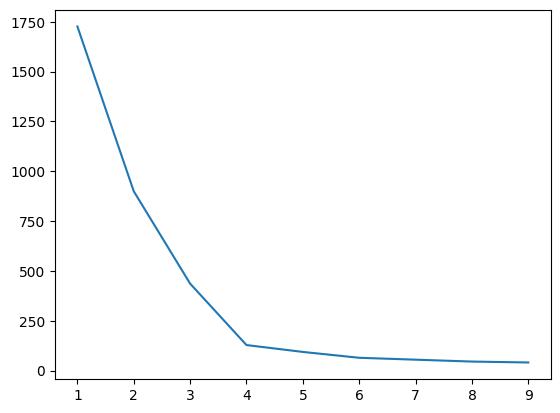

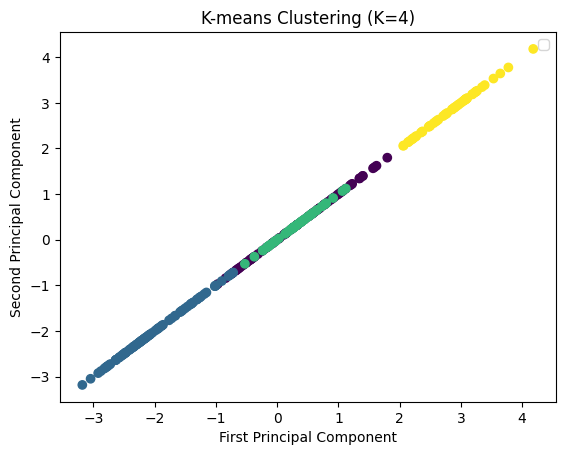

In [148]:
# KMeans
inertia =[]
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state =42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia)
plt.show

n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state =42)
kmeans.fit(penguins_PCA)
plt.figure()
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 0], c = kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()



In [149]:
penguins_clean['label']=kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             45.545763        14.262712         212.779661  4683.050847
3             49.473770        15.718033         221.540984  5484.836066
